# Precio promedio centros comerciales cercanos vs sin centros comerciales cercanos

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [15]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [16]:
dfa = df.loc[(~df['precio'].isnull()) & (~df['centroscomercialescercanos'].isnull()) & (~df['tipodepropiedad'].isnull())].copy()
datos = dfa.loc[:,['precio', 'tipodepropiedad','centroscomercialescercanos']].copy()

bool_cols = datos.columns[datos.dtypes == 'bool']
datos[bool_cols] = df[bool_cols].replace({True: 'Si', False: 'No'})
datos['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

# Centros comerciales cercanos

In [17]:
datos_n = datos.copy()

viviendas = ['Casa', 'Apartamento', 'Casa en condominio','Quinta vacacional']
comercio = ['Local Comercial ', 'Oficina comercial', 'Bodega comercial','Terreno comercial','Local en centro comercial','Edificio','Duplex']
   
datos_n['tipodepropiedad'] = datos_n['tipodepropiedad'].map(lambda x : x if x in comercio else ('Vivienda (casa,depa,quinta)' if x in viviendas else 'Otros'))
datos_n.head(15)

,precio,tipodepropiedad,centroscomercialescercanos
0,2273000,"Vivienda (casa,depa,quinta)",No
1,3600000,"Vivienda (casa,depa,quinta)",Si
2,1200000,"Vivienda (casa,depa,quinta)",No
3,650000,"Vivienda (casa,depa,quinta)",Si
4,1150000,"Vivienda (casa,depa,quinta)",No
5,1100000,"Vivienda (casa,depa,quinta)",Si
6,1150000,"Vivienda (casa,depa,quinta)",No
7,4200000,"Vivienda (casa,depa,quinta)",No
8,310000,"Vivienda (casa,depa,quinta)",Si
9,6200000,Otros,No


In [18]:
datos_n['tipodepropiedad'].value_counts() #OK

Vivienda (casa,depa,quinta)    218355
Otros                           15222
Oficina comercial                1741
Bodega comercial                 1406
Edificio                         1396
Terreno comercial                1326
Duplex                            343
Local en centro comercial         165
Name: tipodepropiedad, dtype: int64

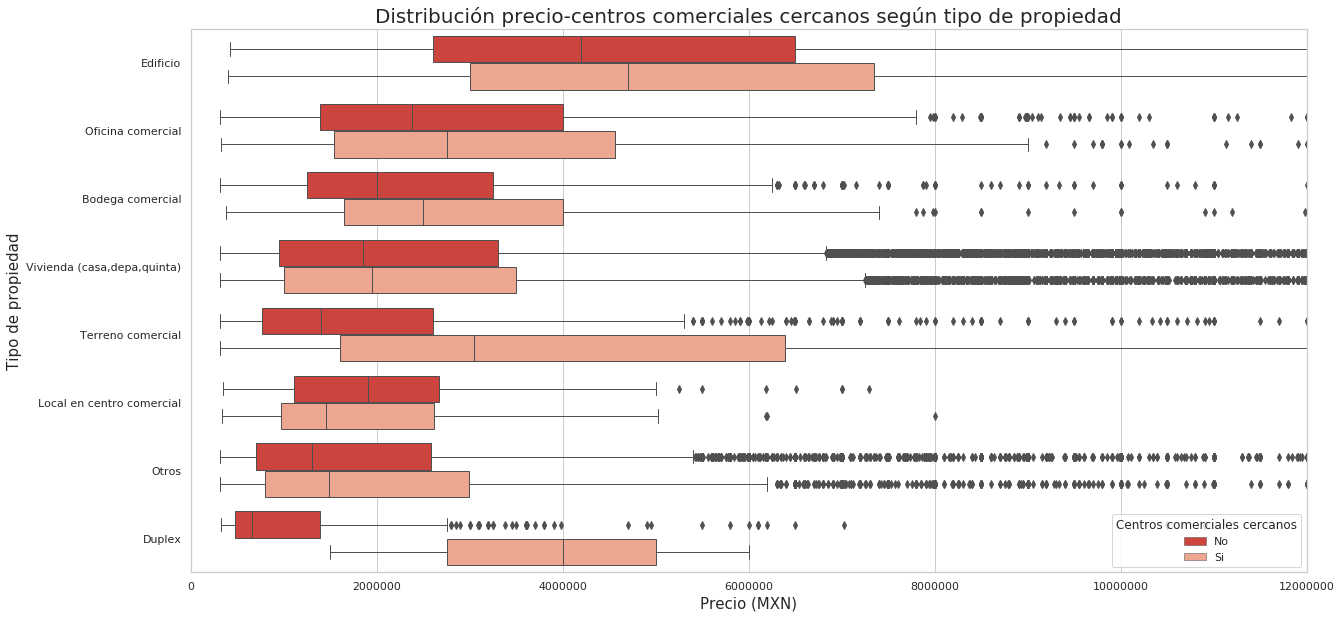

In [19]:
sns.set(style="whitegrid")

ranks = datos_n.groupby("tipodepropiedad")["precio"].mean().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x') #fix de visualización del eje y

grafico = sns.boxplot(order = ranks, fliersize= 5, hue = "centroscomercialescercanos", x="precio", y="tipodepropiedad", data=datos_n, palette = "Reds_r", linewidth=1)
grafico.set_xlim((0,12000000))
plt.legend(title='Centros comerciales cercanos', loc='lower right')
grafico.set_title("Distribución precio-centros comerciales cercanos según tipo de propiedad", fontsize=20)
grafico.set_xlabel("Precio (MXN)",fontsize=15)
grafico.set_ylabel("Tipo de propiedad", fontsize=15)
grafico.figure.savefig("Distribución precio-centros comerciales cercanos según tipo de propiedad.png",bbox_inches='tight')

Se pueden observar ciertas diferencias en los precios, en especial Terreno comercial. Nótese que 

# Precio promedio general entre todas las propiedades

In [20]:
datos_c = datos_n.loc[:,['precio','centroscomercialescercanos']].copy()
datos_c.head()

,precio,centroscomercialescercanos
0,2273000,No
1,3600000,Si
2,1200000,No
3,650000,Si
4,1150000,No


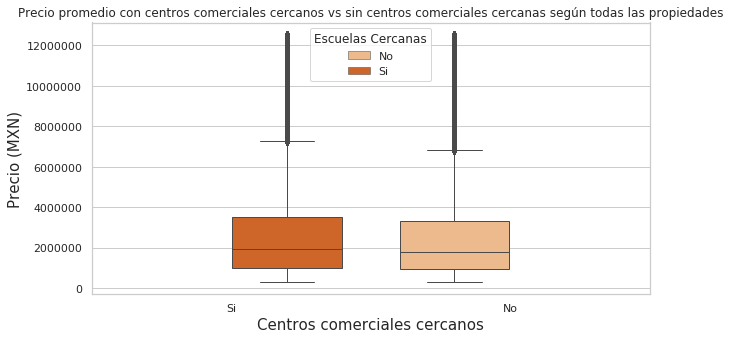

In [21]:
sns.set(style="whitegrid")

ranks = datos_c.groupby("centroscomercialescercanos")["precio"].mean().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='y') #fix de visualización del eje y

grafico = sns.boxplot(order = ranks, hue = "centroscomercialescercanos", x="centroscomercialescercanos", y="precio", data=datos_c, palette = "Oranges", linewidth=1)
plt.legend(title='Escuelas Cercanas', loc='upper center')
grafico.set_title("Precio promedio con centros comerciales cercanos vs sin centros comerciales cercanas según todas las propiedades", fontsize=12)
grafico.set_xlabel("Centros comerciales cercanos",fontsize=15)
grafico.set_ylabel("Precio (MXN)", fontsize=15)
grafico.figure.savefig("Relación precio-escuelas cercanas.png",bbox_inches='tight')